In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [6]:
#not using at this moment
#df = pd.read_csv('Metro_Interstate_Traffic_Volume_Encoded_ver1.csv',index_col='date_time',parse_dates=True)
#df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,date,hour,month,year
date_time,,,,,,,,,,,,,
2012-10-02 09:00:00,0,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,1,2012-10-02,9,10,2012
2012-10-02 10:00:00,0,289.36,0.0,0.0,75,Clouds,broken clouds,4516,1,2012-10-02,10,10,2012
2012-10-02 11:00:00,0,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,1,2012-10-02,11,10,2012
2012-10-02 12:00:00,0,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,1,2012-10-02,12,10,2012
2012-10-02 13:00:00,0,291.14,0.0,0.0,75,Clouds,broken clouds,4918,1,2012-10-02,13,10,2012


In [3]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume_Encoded_ver1.csv',parse_dates=True)
df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,date,hour,month,year
0,2012-10-02 09:00:00,0,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,1,2012-10-02,9,10,2012
1,2012-10-02 10:00:00,0,289.36,0.0,0.0,75,Clouds,broken clouds,4516,1,2012-10-02,10,10,2012
2,2012-10-02 11:00:00,0,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,1,2012-10-02,11,10,2012
3,2012-10-02 12:00:00,0,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,1,2012-10-02,12,10,2012
4,2012-10-02 13:00:00,0,291.14,0.0,0.0,75,Clouds,broken clouds,4918,1,2012-10-02,13,10,2012


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48203 entries, 0 to 48202
Data columns (total 14 columns):
date_time              48203 non-null object
holiday                48203 non-null int64
temp                   48203 non-null float64
rain_1h                48203 non-null float64
snow_1h                48203 non-null float64
clouds_all             48203 non-null int64
weather_main           48203 non-null object
weather_description    48203 non-null object
traffic_volume         48203 non-null int64
weekday                48203 non-null int64
date                   48203 non-null object
hour                   48203 non-null int64
month                  48203 non-null int64
year                   48203 non-null int64
dtypes: float64(3), int64(7), object(4)
memory usage: 5.1+ MB


In [5]:
df.shape

(48203, 14)

In [6]:
df.describe()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weekday,hour,month,year
count,48203.000000,48203.000000,48203.000000,48203.000000,48203.000000,48203.000000,48203.000000,48203.000000,48203.000000,48203.000000
mean,0.001265,281.258421,0.130315,0.000222,49.361699,3259.771155,2.985042,11.398046,6.506027,2015.512416
std,0.035551,12.713505,1.003378,0.008168,39.015980,1986.854254,2.005915,6.940263,3.400256,1.893230
min,0.000000,243.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000
25%,0.000000,272.160000,0.000000,0.000000,1.000000,1193.000000,1.000000,5.000000,4.000000,2014.000000
50%,0.000000,282.450000,0.000000,0.000000,64.000000,3380.000000,3.000000,11.000000,7.000000,2016.000000
75%,0.000000,291.806000,0.000000,0.000000,90.000000,4933.000000,5.000000,17.000000,9.000000,2017.000000
max,1.000000,310.070000,55.630000,0.510000,100.000000,7280.000000,6.000000,23.000000,12.000000,2018.000000


In [7]:
df.isna().sum()

date_time              0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
weekday                0
date                   0
hour                   0
month                  0
year                   0
dtype: int64

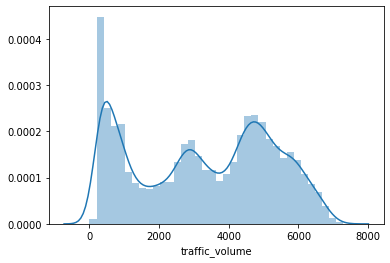

In [8]:
sns.distplot(df['traffic_volume'])

In [9]:
quantile1, quantile3 = np.percentile(df['traffic_volume'],[25,75])
print(quantile1,quantile3)

1193.0 4933.0


In [10]:
IQR_traffice_volume = quantile3 - quantile1
print(IQR_traffice_volume)

3740.0


In [11]:
lower_bound_value_tv = quantile1 - (1.5*IQR_traffice_volume)
higher_bound_value_tv = quantile3 + (1.5*IQR_traffice_volume)

print(lower_bound_value_tv,higher_bound_value_tv)

-4417.0 10543.0


In [12]:
df[(df['traffic_volume']<=150) & (df['weather_main'] == 'Clear') ]

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,date,hour,month,year
16849,2015-07-25 08:00:00,0,295.27,0.0,0.0,1,Clear,sky is clear,1,5,2015-07-25,8,7,2015
16850,2015-07-25 09:00:00,0,295.82,0.0,0.0,1,Clear,sky is clear,1,5,2015-07-25,9,7,2015
22971,2016-05-02 01:00:00,0,279.98,0.0,0.0,1,Clear,sky is clear,149,0,2016-05-02,1,5,2016
22972,2016-05-02 02:00:00,0,278.31,0.0,0.0,1,Clear,sky is clear,123,0,2016-05-02,2,5,2016
24819,2016-07-09 21:00:00,0,296.15,0.0,0.0,1,Clear,sky is clear,10,5,2016-07-09,21,7,2016
24820,2016-07-09 22:00:00,0,295.16,0.0,0.0,1,Clear,sky is clear,11,5,2016-07-09,22,7,2016
25154,2016-07-22 22:00:00,0,297.72,0.0,0.0,1,Clear,sky is clear,64,4,2016-07-22,22,7,2016
25155,2016-07-22 23:00:00,0,296.77,0.0,0.0,1,Clear,sky is clear,10,4,2016-07-22,23,7,2016
25157,2016-07-23 01:00:00,0,295.20,0.0,0.0,1,Clear,sky is clear,8,5,2016-07-23,1,7,2016
25159,2016-07-23 03:00:00,0,294.42,0.0,0.0,1,Clear,sky is clear,3,5,2016-07-23,3,7,2016


In [13]:
df[(df['traffic_volume']<=150)].shape

(69, 14)

We are identifying few very low traffic volumes in the given dataset, we can see there are very less points considering the fact that there are almost 48K records available.

In [14]:
df[df['date'] == "2016-07-23"]

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,date,hour,month,year
25156,2016-07-23 00:00:00,0,295.85,0.00,0.0,1,Mist,mist,6,5,2016-07-23,0,7,2016
25157,2016-07-23 01:00:00,0,295.20,0.00,0.0,1,Clear,sky is clear,8,5,2016-07-23,1,7,2016
25158,2016-07-23 02:00:00,0,294.82,0.00,0.0,1,Mist,mist,5,5,2016-07-23,2,7,2016
25159,2016-07-23 03:00:00,0,294.42,0.00,0.0,1,Clear,sky is clear,3,5,2016-07-23,3,7,2016
25160,2016-07-23 04:00:00,0,294.19,0.00,0.0,1,Clear,sky is clear,7,5,2016-07-23,4,7,2016
25161,2016-07-23 05:00:00,0,294.51,0.00,0.0,1,Clear,sky is clear,830,5,2016-07-23,5,7,2016
25162,2016-07-23 06:00:00,0,294.48,0.00,0.0,75,Clouds,broken clouds,1350,5,2016-07-23,6,7,2016
25163,2016-07-23 07:00:00,0,295.96,0.00,0.0,75,Clouds,broken clouds,1868,5,2016-07-23,7,7,2016
25164,2016-07-23 08:00:00,0,298.14,0.00,0.0,90,Clouds,overcast clouds,2497,5,2016-07-23,8,7,2016
25165,2016-07-23 09:00:00,0,299.11,0.00,0.0,75,Clouds,broken clouds,15,5,2016-07-23,9,7,2016


In [15]:
df[(df['month'] == 7) & (df['hour'] == 8) & (df['weather_main']=='Clear')].describe()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weekday,hour,month,year
count,61.0,61.000000,61.0,61.0,61.000000,61.000000,61.000000,61.0,61.0,61.000000
mean,0.0,292.150098,0.0,0.0,1.344262,4070.360656,3.065574,8.0,7.0,2015.508197
std,0.0,2.960816,0.0,0.0,1.672177,1706.712073,2.023766,0.0,0.0,1.831420
min,0.0,284.580000,0.0,0.0,0.000000,1.000000,0.000000,8.0,7.0,2013.000000
25%,0.0,290.870000,0.0,0.0,1.000000,2523.000000,1.000000,8.0,7.0,2014.000000
50%,0.0,292.270000,0.0,0.0,1.000000,4986.000000,3.000000,8.0,7.0,2015.000000
75%,0.0,293.750000,0.0,0.0,1.000000,5621.000000,5.000000,8.0,7.0,2017.000000
max,0.0,298.430000,0.0,0.0,8.000000,6211.000000,6.000000,8.0,7.0,2018.000000


In [16]:
df[(df['year']== 2015) & (df['month'] == 7) & (df['hour'] == 8) & (df['weather_main']=='Clear')]['traffic_volume'].median()

4987.0

Performing one-hot encoding for weather_main column

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
ohe = OneHotEncoder(drop='first')

In [19]:
weather_main = pd.DataFrame(ohe.fit_transform(df[['weather_main']]).toarray())
weather_main.columns = ohe.get_feature_names(['weather'])
weather_main.head()

,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
ohe.categories_

[array(['Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain',
        'Smoke', 'Snow', 'Squall', 'Thunderstorm'], dtype=object)]

In [21]:
weather_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48203 entries, 0 to 48202
Data columns (total 10 columns):
weather_Clouds          48203 non-null float64
weather_Drizzle         48203 non-null float64
weather_Fog             48203 non-null float64
weather_Haze            48203 non-null float64
weather_Mist            48203 non-null float64
weather_Rain            48203 non-null float64
weather_Smoke           48203 non-null float64
weather_Snow            48203 non-null float64
weather_Squall          48203 non-null float64
weather_Thunderstorm    48203 non-null float64
dtypes: float64(10)
memory usage: 3.7 MB


In [172]:
import pickle

In [173]:
#saving the one-hot encoder for future use
with open('onehotencoder.pickle', 'wb') as f:
    pickle.dump(ohe, f)

Joining the encoded dataframe with the actual dataset.

In [22]:
df_encoded = df.join(weather_main)
df_encoded.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,...,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
0,2012-10-02 09:00:00,0,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-10-02 10:00:00,0,289.36,0.0,0.0,75,Clouds,broken clouds,4516,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-10-02 11:00:00,0,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-10-02 12:00:00,0,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-10-02 13:00:00,0,291.14,0.0,0.0,75,Clouds,broken clouds,4918,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48203 entries, 0 to 48202
Data columns (total 24 columns):
date_time               48203 non-null object
holiday                 48203 non-null int64
temp                    48203 non-null float64
rain_1h                 48203 non-null float64
snow_1h                 48203 non-null float64
clouds_all              48203 non-null int64
weather_main            48203 non-null object
weather_description     48203 non-null object
traffic_volume          48203 non-null int64
weekday                 48203 non-null int64
date                    48203 non-null object
hour                    48203 non-null int64
month                   48203 non-null int64
year                    48203 non-null int64
weather_Clouds          48203 non-null float64
weather_Drizzle         48203 non-null float64
weather_Fog             48203 non-null float64
weather_Haze            48203 non-null float64
weather_Mist            48203 non-null float64
weather_Rain    

In [24]:
#Converting the data-time variable into timestamp format
df_encoded['date_time'] = pd.to_datetime(df_encoded.date_time)

In [25]:
# Now making the data_time column as our index, in order to indentify serially all the dates
df_encoded = df_encoded.set_index('date_time')
df_encoded.sample(4)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,weekday,date,...,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
date_time,,,,,,,,,,,,,,,,,,,,,
2015-08-02 12:00:00,0,299.69,0.00,0.0,90,Clouds,overcast clouds,3853,6,2015-08-02,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-06 01:00:00,0,285.38,3.30,0.0,1,Mist,mist,350,3,2018-09-06,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-08-26 13:00:00,0,294.86,0.00,0.0,1,Clear,sky is clear,5243,2,2015-08-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-16 12:00:00,0,294.63,0.25,0.0,90,Haze,haze,5067,3,2015-07-16,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48203 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 23 columns):
holiday                 48203 non-null int64
temp                    48203 non-null float64
rain_1h                 48203 non-null float64
snow_1h                 48203 non-null float64
clouds_all              48203 non-null int64
weather_main            48203 non-null object
weather_description     48203 non-null object
traffic_volume          48203 non-null int64
weekday                 48203 non-null int64
date                    48203 non-null object
hour                    48203 non-null int64
month                   48203 non-null int64
year                    48203 non-null int64
weather_Clouds          48203 non-null float64
weather_Drizzle         48203 non-null float64
weather_Fog             48203 non-null float64
weather_Haze            48203 non-null float64
weather_Mist            48203 non-null float64
weather_Rain            482

In [27]:

X = df_encoded.drop(['weather_main','weather_description','date','traffic_volume'],axis=1)


y = df_encoded['traffic_volume']

In [12]:
#X = df[['holiday','temp','rain_1h','snow_1h','clouds_all','weather_main','weekday','hour','month','year']]
#y = df['traffic_volume']

In [28]:
X.shape

(48203, 19)

In [29]:
y.shape

(48203,)

In [30]:
X.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weekday,hour,month,year,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
date_time,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,0,288.28,0.0,0.0,40,1,9,10,2012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 10:00:00,0,289.36,0.0,0.0,75,1,10,10,2012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 11:00:00,0,289.58,0.0,0.0,90,1,11,10,2012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 12:00:00,0,290.13,0.0,0.0,90,1,12,10,2012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 13:00:00,0,291.14,0.0,0.0,75,1,13,10,2012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#one-hot encoding for weather main

#weather_main = pd.get_dummies(X['weather_main'],prefix='weather',drop_first=True)
#weather_main.head()

,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
date_time,,,,,,,,,,
2012-10-02 09:00:00,1,0,0,0,0,0,0,0,0,0
2012-10-02 10:00:00,1,0,0,0,0,0,0,0,0,0
2012-10-02 11:00:00,1,0,0,0,0,0,0,0,0,0
2012-10-02 12:00:00,1,0,0,0,0,0,0,0,0,0
2012-10-02 13:00:00,1,0,0,0,0,0,0,0,0,0


In [18]:
#adding the dummy columns
#X_encoded = pd.concat([X,weather_main],axis=1)
#X_encoded.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weekday,hour,month,year,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
date_time,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,0,288.28,0.0,0.0,40,Clouds,1,9,10,2012,1,0,0,0,0,0,0,0,0,0
2012-10-02 10:00:00,0,289.36,0.0,0.0,75,Clouds,1,10,10,2012,1,0,0,0,0,0,0,0,0,0
2012-10-02 11:00:00,0,289.58,0.0,0.0,90,Clouds,1,11,10,2012,1,0,0,0,0,0,0,0,0,0
2012-10-02 12:00:00,0,290.13,0.0,0.0,90,Clouds,1,12,10,2012,1,0,0,0,0,0,0,0,0,0
2012-10-02 13:00:00,0,291.14,0.0,0.0,75,Clouds,1,13,10,2012,1,0,0,0,0,0,0,0,0,0


In [19]:
#X_encoded.drop(['weather_main'],axis=1,inplace=True)
#X_encoded.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weekday,hour,month,year,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
date_time,,,,,,,,,,,,,,,,,,,
2018-09-30 19:00:00,0,283.45,0.0,0.0,75,6,19,9,2018,1,0,0,0,0,0,0,0,0,0
2018-09-30 20:00:00,0,282.76,0.0,0.0,90,6,20,9,2018,1,0,0,0,0,0,0,0,0,0
2018-09-30 21:00:00,0,282.73,0.0,0.0,90,6,21,9,2018,0,0,0,0,0,0,0,0,0,1
2018-09-30 22:00:00,0,282.09,0.0,0.0,90,6,22,9,2018,1,0,0,0,0,0,0,0,0,0
2018-09-30 23:00:00,0,282.12,0.0,0.0,90,6,23,9,2018,1,0,0,0,0,0,0,0,0,0


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48203 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 19 columns):
holiday                 48203 non-null int64
temp                    48203 non-null float64
rain_1h                 48203 non-null float64
snow_1h                 48203 non-null float64
clouds_all              48203 non-null int64
weekday                 48203 non-null int64
hour                    48203 non-null int64
month                   48203 non-null int64
year                    48203 non-null int64
weather_Clouds          48203 non-null float64
weather_Drizzle         48203 non-null float64
weather_Fog             48203 non-null float64
weather_Haze            48203 non-null float64
weather_Mist            48203 non-null float64
weather_Rain            48203 non-null float64
weather_Smoke           48203 non-null float64
weather_Snow            48203 non-null float64
weather_Squall          48203 non-null float64
weather_Thunderstorm  

## Train-Test Split

Now since this is a time based data, we would first create our train set on the older data then test our model performance on the test data which would be the newer or latest data to understand the performance of our model.

Here the data is from 2nd October,2012 to 30th Sept,2018. We are taking our train set data till 31st december 2016, our testing data will be the whole of year 2017 and the rest will be our validation data.

In [22]:
#X_train = X_encoded[:'2016-12-31']

#X_test = X_encoded['2017-01-01':'2017-12-31']

#y_train = y[:'2016-12-31']

#y_test = y['2017-01-01':'2017-12-31']

In [32]:
X_train = X[:'2016-12-31']

X_test = X['2017-01-01':'2017-12-31']

y_train = y[:'2016-12-31']

y_test = y['2017-01-01':'2017-12-31']

In [33]:
X_train.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weekday,hour,month,year,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
date_time,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,0,288.28,0.0,0.0,40,1,9,10,2012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 10:00:00,0,289.36,0.0,0.0,75,1,10,10,2012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 11:00:00,0,289.58,0.0,0.0,90,1,11,10,2012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 12:00:00,0,290.13,0.0,0.0,90,1,12,10,2012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-02 13:00:00,0,291.14,0.0,0.0,75,1,13,10,2012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X_train.shape

(29649, 19)

In [35]:
y_train.head()

date_time
2012-10-02 09:00:00    5545
2012-10-02 10:00:00    4516
2012-10-02 11:00:00    4767
2012-10-02 12:00:00    5026
2012-10-02 13:00:00    4918
Name: traffic_volume, dtype: int64

In [36]:
y_train.shape

(29649,)

### Random forest model

In [37]:
random_forest_model = RandomForestRegressor(random_state=10)

random_forest_model.fit(X_train,y_train)

RandomForestRegressor(random_state=10)

In [38]:
random_forest_model.score(X_test,y_test)

0.9345546588391804

In [39]:
random_forest_model.n_estimators

100

In [40]:
#trying to do some hyper-parameter tuning with the existing model
grid_param = {
    "n_estimators" : [100,200,300,400,500],
    "max_depth" : [5,10,15,20],
    "min_samples_leaf" : [1, 2, 5]    
}

In [41]:
grid_search = GridSearchCV(estimator=random_forest_model,param_grid=grid_param,verbose=7,n_jobs=-1)


In [42]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 35.3min finished


GridSearchCV(estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=7)

In [50]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}

In [51]:
grid_search.best_score_

0.9205535495880126

In [45]:
#different parameter
random_forest_model = RandomForestRegressor(max_depth=10,n_estimators=100,min_samples_leaf=5,random_state=10)

In [51]:
#different parameter
#random_forest_model2 = RandomForestRegressor(max_depth=10,n_estimators=500,min_samples_leaf=5,random_state=10)

In [46]:
random_forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, random_state=10)

In [47]:
random_forest_model.score(X_test,y_test)

0.9457522760148218

In [53]:
random_forest_model.score(X_test,y_test)

0.9459839761894352

In [92]:
#rmse of training data
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_train = sqrt(mean_squared_error(y_train,random_forest_model.predict(X_train)))
print(rmse_train)

453.4181677522925


In [93]:
y_predicted = random_forest_model.predict(X_test)
#remse of testing data
rmse = sqrt(mean_squared_error(y_test,y_predicted))
print(rmse)

462.6582484228064


In [94]:
print('Bias Error')
print('Actual value :',np.mean(y_test))
print('Predicted value :',np.mean(y_predicted))

Bias Error
Actual value : 3340.7030645921736
Predicted value : 3224.046622103128


In [95]:
print('Variance Error')
print('Actual value :',np.var(y_test,ddof=1))
print('Predicted value :',np.var(y_predicted,ddof=1))

Variance Error
Actual value : 3946208.7095389
Predicted value : 3609490.1475944133


##### Creating pickle of Random forest model

In [102]:
filename = 'random_forest.pickle' #name of the pickle file
pickle.dump(random_forest_model, open(filename, 'wb'))

loaded_model_rf = pickle.load(open(filename, 'rb'))

### Xgboost model

In [52]:
boosting_model = XGBRegressor(random_state =  6)

In [53]:
boosting_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=6,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
boosting_model.score(X_test,y_test)

0.9375987106074741

Now we will perform hyper-parameter tuning using randomized search CV

In [55]:
# parameters for randomized search CV
random_grid = {
    'learning_rate' : [0.5,0.3,0.2,0.1,0.05],
    'max_depth': [5,8,12,20,25],
    'n_estimators':[40,50,70,100]
}

In [57]:
#Creating RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=boosting_model,param_distributions=random_grid,n_iter=80,cv=5,verbose=7,n_jobs=-1)

In [58]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 18.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, random_state=6,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_

In [59]:
random_search.best_params_

{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05}

In [60]:
random_search.best_score_

0.9216048396745526

In [61]:
new_boosting_model = XGBRegressor(n_estimators= 100, max_depth= 5, learning_rate= 0.05, random_state =  6)

In [71]:
#boosting_model2 = XGBRegressor(n_estimators= 70, max_depth= 5, learning_rate= 0.3, random_state =  6)

In [62]:
new_boosting_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=6,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
#boosting_model2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=70, n_jobs=0, num_parallel_tree=1, random_state=6,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
#Performance of hypertuned model
new_boosting_model.score(X_test,y_test)

0.9405000570883384

In [70]:
#Performance of hypertuned model
#using this model
#boosting_model.score(X_test,y_test)

0.9416151903541531

We can see our Random forest model is performing slightly better than the Xgboost model.

In [65]:
#rmse of training data
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_train = sqrt(mean_squared_error(y_train,new_boosting_model.predict(X_train)))
print(rmse_train)

484.3935053057882


In [66]:
y_predicted = new_boosting_model.predict(X_test)

In [67]:
#remse of testing data
rmse = sqrt(mean_squared_error(y_test,y_predicted))
print(rmse)

484.53797839942735


In [87]:
print('Bias Error')
print('Actual value :',np.mean(y_test))
print('Predicted value :',np.mean(y_predicted))

Bias Error
Actual value : 3340.7030645921736
Predicted value : 3195.4912


In [88]:
print('Variance Error')
print('Actual value :',np.var(y_test,ddof=1))
print('Predicted value :',np.var(y_predicted,ddof=1))

Variance Error
Actual value : 3946208.7095389
Predicted value : 3467159.0


### Creating pickle file of the Xgboost model

In [101]:
import pickle

In [178]:
filename = 'xgboost_model.pickle' #name of the pickle file
pickle.dump(boosting_model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [179]:
loaded_model.predict(a) #testing

array([391.57675], dtype=float32)

#### Validation dataset

In [44]:
#Validation_X = X_encoded['2018-01-01':]
#Validation_y = y['2018-01-01':]

In [68]:
Validation_X = X['2018-01-01':]
Validation_y = y['2018-01-01':]

In [80]:
Validation_X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7949 entries, 2018-01-01 00:00:00 to 2018-09-30 23:00:00
Data columns (total 19 columns):
holiday                 7949 non-null int64
temp                    7949 non-null float64
rain_1h                 7949 non-null float64
snow_1h                 7949 non-null float64
clouds_all              7949 non-null int64
weekday                 7949 non-null int64
hour                    7949 non-null int64
month                   7949 non-null int64
year                    7949 non-null int64
weather_Clouds          7949 non-null float64
weather_Drizzle         7949 non-null float64
weather_Fog             7949 non-null float64
weather_Haze            7949 non-null float64
weather_Mist            7949 non-null float64
weather_Rain            7949 non-null float64
weather_Smoke           7949 non-null float64
weather_Snow            7949 non-null float64
weather_Squall          7949 non-null float64
weather_Thunderstorm    7949 non-null flo

In [69]:
Validation_X.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weekday,hour,month,year,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
date_time,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1,249.36,0.0,0.0,1,0,0,1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:00:00,0,249.08,0.0,0.0,1,0,1,1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 02:00:00,0,248.86,0.0,0.0,1,0,2,1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 03:00:00,0,248.72,0.0,0.0,1,0,3,1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01 04:00:00,0,248.43,0.0,0.0,1,0,4,1,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
Validation_X.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weekday,hour,month,year,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
date_time,,,,,,,,,,,,,,,,,,,
2018-09-30 19:00:00,0,283.45,0.0,0.0,75,6,19,9,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-30 20:00:00,0,282.76,0.0,0.0,90,6,20,9,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-30 21:00:00,0,282.73,0.0,0.0,90,6,21,9,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-09-30 22:00:00,0,282.09,0.0,0.0,90,6,22,9,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-30 23:00:00,0,282.12,0.0,0.0,90,6,23,9,2018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
Validation_y.head()

date_time
2018-01-01 00:00:00    1478
2018-01-01 01:00:00    1408
2018-01-01 02:00:00     931
2018-01-01 03:00:00     585
2018-01-01 04:00:00     381
Name: traffic_volume, dtype: int64

In [75]:
a=Validation_X.loc['2018-01-01 03:00:00']

In [76]:
type(a)

pandas.core.series.Series

In [77]:
a = a.to_frame().transpose()
a

,holiday,temp,rain_1h,snow_1h,clouds_all,weekday,hour,month,year,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
2018-01-01 03:00:00,0.0,248.72,0.0,0.0,1.0,0.0,3.0,1.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
Validation_y['2018-01-01 03:00:00']

585

In [83]:
x=Validation_X.loc['2018-09-30 21:00:00']
x = x.to_frame().transpose()
x

,holiday,temp,rain_1h,snow_1h,clouds_all,weekday,hour,month,year,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
2018-09-30 21:00:00,0.0,282.73,0.0,0.0,90.0,6.0,21.0,9.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
Validation_y['2018-09-30 21:00:00']

2159

In [166]:
boosting_model.predict(a)

array([391.57675], dtype=float32)

In [108]:
new_boosting_model.predict(a)

array([381.7845], dtype=float32)

In [109]:
random_forest_model.predict(a)

array([308.79096116])

In [84]:
boosting_model.predict(x)

array([2373.2903], dtype=float32)

In [85]:
random_forest_model.predict(x)

array([2344.89082958])

In [86]:
new_boosting_model.predict(x)

array([2290.9219], dtype=float32)

In [89]:
test_model = Validation_X.tail()

In [90]:
print(new_boosting_model.predict(test_model))
print(random_forest_model.predict(test_model))

[3114.7266 2548.7053 2290.9219 1756.5504 1131.7186]
[3331.49944348 2611.85827237 2344.89082958 1757.04331477 1100.32297724]


In [91]:
Validation_y.tail()

date_time
2018-09-30 19:00:00    3543
2018-09-30 20:00:00    2781
2018-09-30 21:00:00    2159
2018-09-30 22:00:00    1450
2018-09-30 23:00:00     954
Name: traffic_volume, dtype: int64

In [105]:
low_tv=Validation_X.loc['15-04-2018  03:00:00']

In [110]:
low_tv

,holiday,temp,rain_1h,snow_1h,clouds_all,weekday,hour,month,year,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm
date_time,,,,,,,,,,,,,,,,,,,
2018-04-15 03:00:00,0,268.01,0.0,0.0,90,6,3,4,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-04-15 03:00:00,0,268.01,0.0,0.0,90,6,3,4,2018,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-04-15 03:00:00,0,268.01,0.0,0.0,90,6,3,4,2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
random_forest_model.predict(low_tv)

array([394.6343568 , 389.45101579, 392.17641892])

In [107]:
new_boosting_model.predict(low_tv)

array([520.98773, 520.98773, 511.55603], dtype=float32)

In [80]:

print(boosting_model.predict(test))

print(random_forest_model.predict(test))

[484.11725]
[489.705]
